In [1]:
#Import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

In [2]:
# Read the data 
df = pd.read_csv("telecom_dummies.csv")
df.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
# Check the number of rows and columns
df.shape

(7043, 27)

In [4]:
# Check the names of the columns
df.columns

Index(['tenure', 'monthlycharges', 'totalcharges', 'gender_Male',
       'seniorcitizen_1', 'partner_Yes', 'dependents_Yes', 'phoneservice_Yes',
       'multiplelines_Yes', 'onlinesecurity_Yes', 'onlinebackup_Yes',
       'deviceprotection_Yes', 'techsupport_Yes', 'streamingtv_Yes',
       'streamingmovies_Yes', 'paperlessbilling_Yes', 'churn_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [5]:
# Rename this column
df = df.rename(columns={"seniorcitizen_1":"seniorcitizen_Yes"})

<AxesSubplot:>

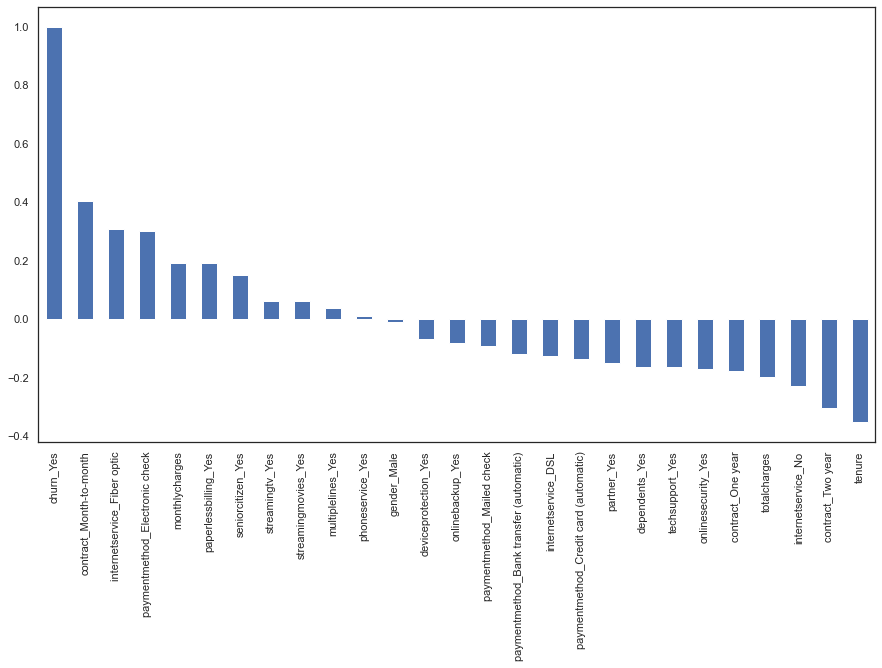

In [6]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['churn_Yes'].sort_values(ascending = False).plot(kind='bar')

In [7]:
# Selecting the features for our X
X = df.drop(["churn_Yes"],axis = 1)
X.shape

(7043, 26)

In [8]:
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [9]:
# Selecting our target
y = df[["churn_Yes"]]
y.head()

,churn_Yes
0,0
1,0
2,1
3,0
4,1


In [10]:
#Importing the libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
# Spliting the data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
# Using the Logistic Regression and fitting the model
# y_train.values.ravel because the shape needs to be (rows, )
# parameters solver='lbfgs', max_iter=1000 for number of inerations not to reach the limit
model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train.values.ravel())

In [13]:
score = model.score(X_test, y_test)
score

0.8204400283889283

In [14]:
prediction_test = model.predict(X_test)
prediction_test

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [15]:
# Saving the model and testing it
import pickle

pickle.dump(model, open('model.pkl','wb'))

saved_model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1.  , 29.85, 29.85,  0.  ,  0.  ,  1. ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.]]))

[0]


C:\Users\Fidrmuc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


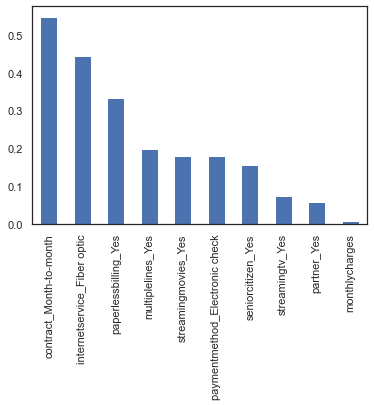

In [16]:
# To get the weights of all the variables to see what contribute the most to the churn
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [17]:
# Create the Confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix  
cm = metrics.confusion_matrix(y_test, prediction_test)
print(cm)

[[931 105]
 [148 225]]


In [ ]:
# Visualising the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [18]:
# Classification report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Feature: tenure
Score {-0.057477745540086306} 

Feature: monthlycharges
Score {0.007423107984642461} 

Feature: totalcharges
Score {0.0003149466636737781} 

Feature: gender_Male
Score {-0.04053729283637255} 

Feature: seniorcitizen_Yes
Score {0.15546291233621853} 

Feature: partner_Yes
Score {0.05739395097398164} 

Feature: dependents_Yes
Score {-0.15855379698108885} 

Feature: phoneservice_Yes
Score {-0.7675458768407117} 

Feature: multiplelines_Yes
Score {0.1973315725157551} 

Feature: onlinesecurity_Yes
Score {-0.5099937276400642} 

Feature: onlinebackup_Yes
Score {-0.24500196038944144} 

Feature: deviceprotection_Yes
Score {-0.09523512565796582} 

Feature: techsupport_Yes
Score {-0.4394429144961022} 

Feature: streamingtv_Yes
Score {0.07239620192279143} 

Feature: streamingmovies_Yes
Score {0.18043070222663643} 

Feature: paperlessbilling_Yes
Score {0.331731456722317} 

Feature: internetservice_DSL
Score {-0.09469579522491685} 

Feature: internetservice_Fiber optic
Score {0.4428410

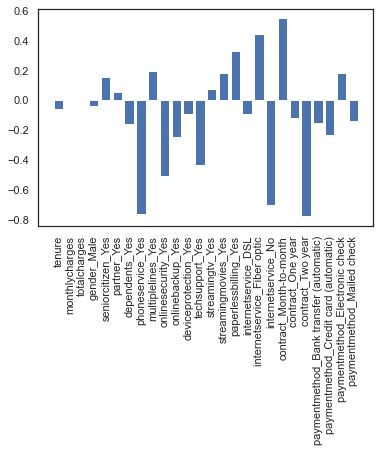

In [19]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = model.coef_[0]
# summarize feature importance
names = []
for i,v in enumerate(importance):
    name = X.columns[i]
    names.append(name)
    print(f'Feature: {name}\nScore',{v},'\n')
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],names, rotation=90)
pyplot.show()

<AxesSubplot:>

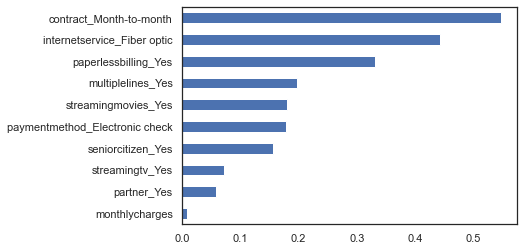

In [20]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
pip install xgboost

In [ ]:
pip install catboost

In [22]:
y = df["churn_Yes"]
print(y.shape)
print(y_train.shape)

(7043,)
(5634, 1)


In [23]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression(solver='lbfgs', max_iter=1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.values.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7288857345635202
RandomForest : 0.7934705464868701
Naive Bayes : 0.7544357700496807
KNeighbours : 0.7757274662881476
SVM : 0.7352732434350603
Neural Network : 0.7927608232789212
LogisticRegression : 0.8204400283889283
ExtraTreesClassifier : 0.78708303761533
AdaBoostClassifier : 0.8147622427253371
GradientBoostingClassifier:  0.8105039034776437
XGB : 0.8019872249822569
CatBoost : 0.8026969481902059


In [24]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression(solver='lbfgs', max_iter=1000)
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_train, y_train.values.ravel())
predictions = eclf1.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8161816891412349


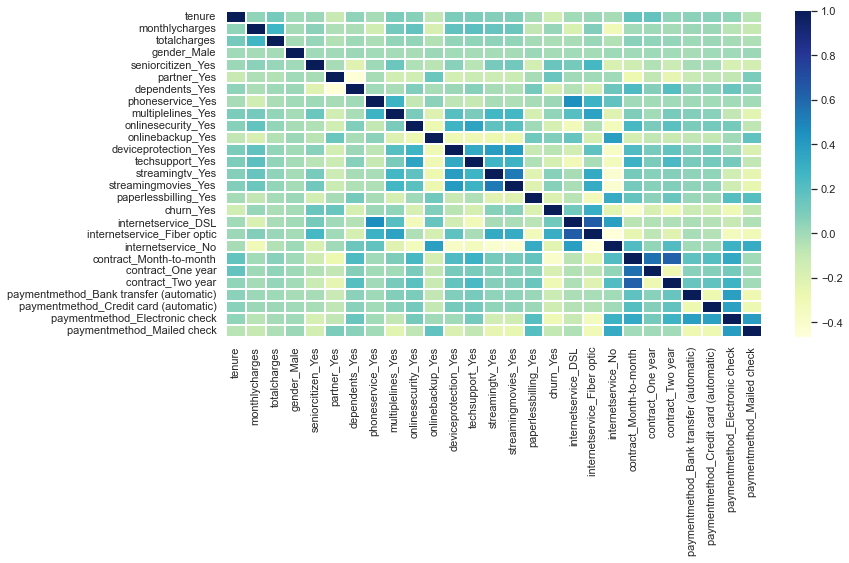

In [25]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

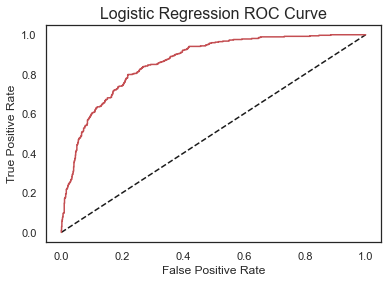

In [31]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()